In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def build_hk_3site(k, t1, t2, t3):
    """
    Constructs the k-space Hamiltonian for the 3-site SSH model.

    Args:
        k (float): Momentum.
        t1 (float): Hopping amplitude between site A and B in the unit cell.
        t2 (float): Hopping amplitude between site B and C in the unit cell.
        t3 (float): Hopping amplitude between site C of one cell and site A of the next cell.

    Returns:
        numpy.ndarray: The 3x3 k-space Hamiltonian matrix.
    """
    # Off-diagonal elements
    H_AB = -t1
    H_BA = -t1  # Assuming t1 is real

    H_BC = -t2
    H_CB = -t2  # Assuming t2 is real

    # Inter-cell hopping (C_n to A_{n+1} and A_{n+1} to C_n)
    # Term -t3 c_C(n)^dagger c_A(n+1) gives -t3 * exp(ik) in H_CA
    # Term -t3 c_A(n+1)^dagger c_C(n) gives -t3 * exp(-ik) in H_AC
    H_AC = -t3 * np.exp(-1j * k)
    H_CA = -t3 * np.exp(1j * k)

    # On-site energies are zero
    hk_matrix = np.array([
        [0,    H_AB, H_AC],
        [H_BA, 0,    H_BC],
        [H_CA, H_CB, 0   ]
    ], dtype=np.complex128) # Ensure complex type for exp(ik)

    return hk_matrix

def calculate_bands_3site(t1, t2, t3, num_k_points=200):
    """
    Calculates the band structure for the 3-site SSH model.

    Args:
        t1 (float): Hopping t1.
        t2 (float): Hopping t2.
        t3 (float): Hopping t3.
        num_k_points (int): Number of k-points in the Brillouin zone.

    Returns:
        tuple: (k_values, energies)
               k_values (numpy.ndarray): Array of k-points from -pi to pi.
               energies (numpy.ndarray): Array of energies, shape (num_k_points, 3).
    """
    k_values = np.linspace(-np.pi, np.pi, num_k_points)
    energies = np.zeros((num_k_points, 3)) # We expect 3 bands

    for i, k in enumerate(k_values):
        hk = build_hk_3site(k, t1, t2, t3)
        # For Hermitian matrices, eigvalsh is efficient and returns real eigenvalues
        eigenvalues = np.linalg.eigvalsh(hk)
        energies[i, :] = np.sort(eigenvalues) # Sort them for consistent plotting

    return k_values, energies

def plot_bands(k_values, energies, t1, t2, t3):
    """
    Plots the band structure.
    """
    plt.figure(figsize=(8, 6))
    for band_idx in range(energies.shape[1]): # Should be 3 bands
        plt.plot(k_values, energies[:, band_idx], label=f'Band {band_idx + 1}')

    plt.xlabel(r'$k$ (momentum, with $a=1$)')
    plt.ylabel(r'Energy $E(k)$')
    plt.title(f'Band Structure of 3-site SSH Model\n$t_1={t1:.1f}, t_2={t2:.1f}, t_3={t3:.1f}$')
    plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
               [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

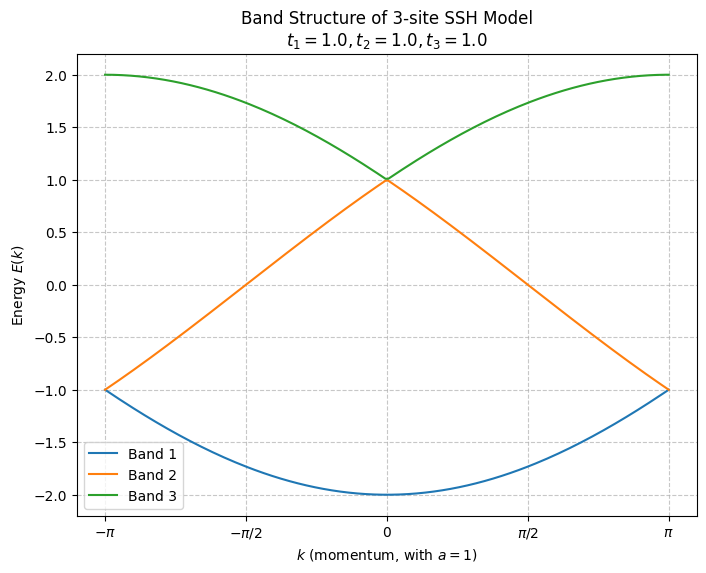

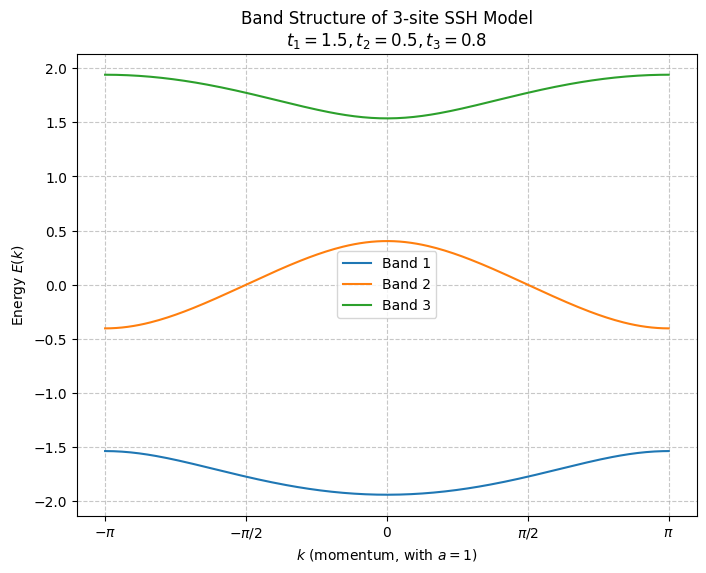

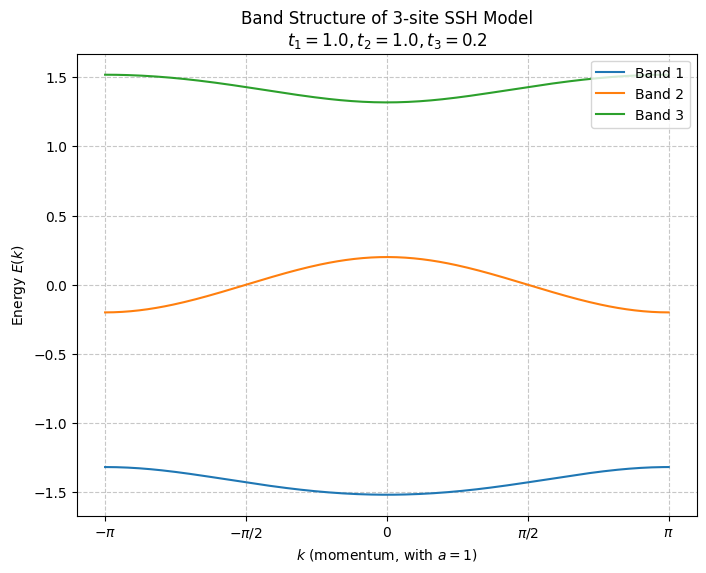

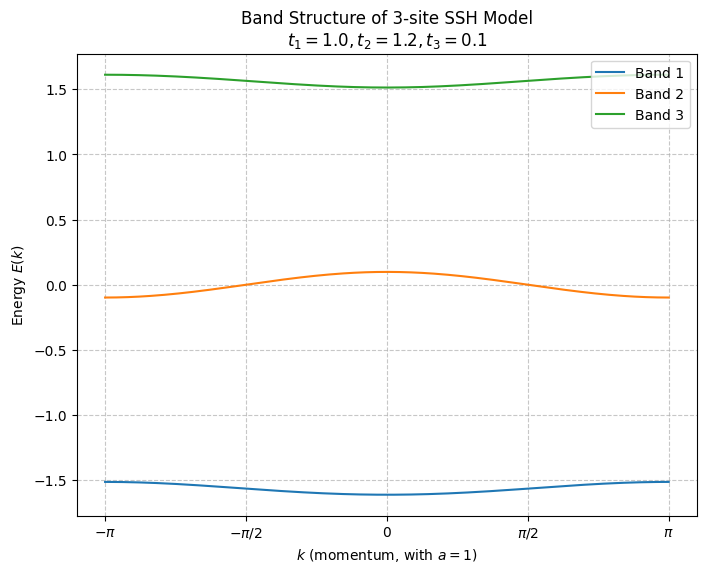

In [9]:

# --- Main execution ---
if __name__ == "__main__":
    # Define hopping parameters
    # Example 1: All hoppings equal (like a uniform chain with 3-atom basis)
    t1_ex1, t2_ex1, t3_ex1 = 1.0, 1.0, 1.0
    k_vals_ex1, E_vals_ex1 = calculate_bands_3site(t1_ex1, t2_ex1, t3_ex1)
    plot_bands(k_vals_ex1, E_vals_ex1, t1_ex1, t2_ex1, t3_ex1)

    # Example 2: Dimerized case (strong t1, weak t2 and t3, or other combinations)
    t1_ex2, t2_ex2, t3_ex2 = 1.5, 0.5, 0.8
    k_vals_ex2, E_vals_ex2 = calculate_bands_3site(t1_ex2, t2_ex2, t3_ex2)
    plot_bands(k_vals_ex2, E_vals_ex2, t1_ex2, t2_ex2, t3_ex2)

    # Example 3: A case that might show interesting gaps
    t1_ex3, t2_ex3, t3_ex3 = 1.0, 1.0, 0.2 # Weaker inter-cell coupling
    k_vals_ex3, E_vals_ex3 = calculate_bands_3site(t1_ex3, t2_ex3, t3_ex3)
    plot_bands(k_vals_ex3, E_vals_ex3, t1_ex3, t2_ex3, t3_ex3)

    # Example 4: Trimerized limit (t3 << t1, t2)
    t1_ex4, t2_ex4, t3_ex4 = 1.0, 1.2, 0.1
    k_vals_ex4, E_vals_ex4 = calculate_bands_3site(t1_ex4, t2_ex4, t3_ex4)
    plot_bands(k_vals_ex4, E_vals_ex4, t1_ex4, t2_ex4, t3_ex4)
